# Stable Diffusion Keras [GPU]

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bacalhau-project/examples/blob/main/model-inference/gpu-keras-stable-diffusion/index.ipynb)
[![Open In Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/bacalhau-project/examples/HEAD?labpath=model-inference/gpu-keras-stable-diffusion/index.ipynb)

#### **Prompt**


```
Speed of Light
```



#### **Output**
![](https://i.imgur.com/cCuXiWe.jpg)

In this example we will be running stable diffusion using on a GPU using bacalhau

The source of this example is this [notebook](https://colab.research.google.com/drive/1zVTa4mLeM_w44WaFwl7utTaa6JcaH1zK?usp=sharing)

# Keras Stable Diffusion: GPU starter example

## Install GPU requirements

In [ ]:
%%bash
pip install git+https://github.com/fchollet/stable-diffusion-tensorflow --upgrade --quiet
pip install tensorflow tensorflow_addons ftfy --upgrade --quiet
pip install tqdm
apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 1.1 MB 15.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 5.9 MB 56.0 MB/s 
     |████████████████████████████████| 1.7 MB 59.2 MB/s 
     |████████████████████████████████| 438 kB 70.1 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+c

## Let's instantiate a Text2Image generator and make a first image

The first run has a bit of extra compilation overhead.

198152112/198152112 [==============================] - 1s 0us/step


  0   1: 100%|██████████| 50/50 [01:10<00:00,  1.41s/it]


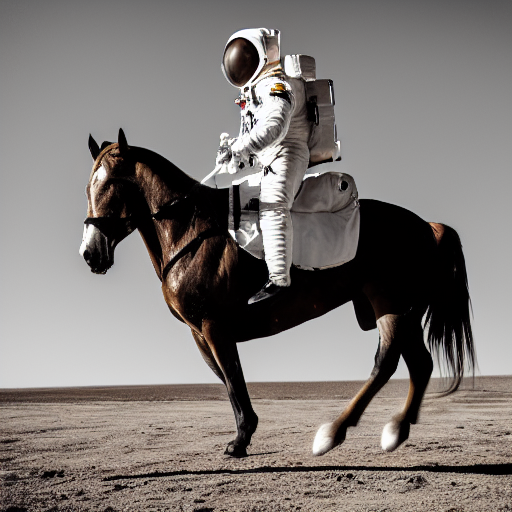

In [ ]:
from stable_diffusion_tf.stable_diffusion import Text2Image
from PIL import Image

generator = Text2Image( 
    img_height=512,
    img_width=512,
    jit_compile=False,  # You can try True as well (different performance profile)
)
img = generator.generate(
    "DSLR photograph of an astronaut riding a horse",
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=1,
)
pil_img = Image.fromarray(img[0])
display(pil_img)

In [ ]:
%%bash
pip install numba

In [ ]:
# clearing the GPU memory 
from numba import cuda 
device = cuda.get_current_device()
device.reset()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



We will write a script that can take arguments and pass it to the stable diffusion generator

That generates images and save the outputs as images



In [ ]:
%%writefile stable-diffusion.py
import argparse
from stable_diffusion_tf.stable_diffusion import Text2Image
from PIL import Image
import os
parser = argparse.ArgumentParser(description="Stable Diffusion")
parser.add_argument("--h",dest="height", type=int,help="height of the image",default=512)
parser.add_argument("--w",dest="width", type=int,help="width of the image",default=512)
parser.add_argument("--p",dest="prompt", type=str,help="Description of the image you want to generate",default="cat")
parser.add_argument("--n",dest="numSteps", type=int,help="Number of Steps",default=50)
parser.add_argument("--u",dest="unconditionalGuidanceScale", type=float,help="Number of Steps",default=7.5)
parser.add_argument("--t",dest="temperature", type=int,help="Number of Steps",default=1)
parser.add_argument("--b",dest="batchSize", type=int,help="Number of Images",default=1)
parser.add_argument("--o",dest="output", type=str,help="Output Folder where to store the Image",default="./")

args=parser.parse_args()
height=args.height
width=args.width
prompt=args.prompt
numSteps=args.numSteps
unconditionalGuidanceScale=args.unconditionalGuidanceScale
temperature=args.temperature
batchSize=args.batchSize
output=args.output

generator = Text2Image(
    img_height=height,
    img_width=width,
    jit_compile=False,  # You can try True as well (different performance profile)
)

img = generator.generate(
    prompt,
    num_steps=numSteps,
    unconditional_guidance_scale=unconditionalGuidanceScale,
    temperature=temperature,
    batch_size=batchSize,
)
for i in range(0,batchSize):
  pil_img = Image.fromarray(img[i])
  image = pil_img.save(f"{output}/image{i}.png")


Overwriting stable-diffusion.py


In [ ]:
%%bash
python stable-diffusion.py

2022-09-29 15:57:32.473158: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 15:57:33.475937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-09-29 15:57:33.476158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-09-29 15:57:33.476182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Viewing the outputted image

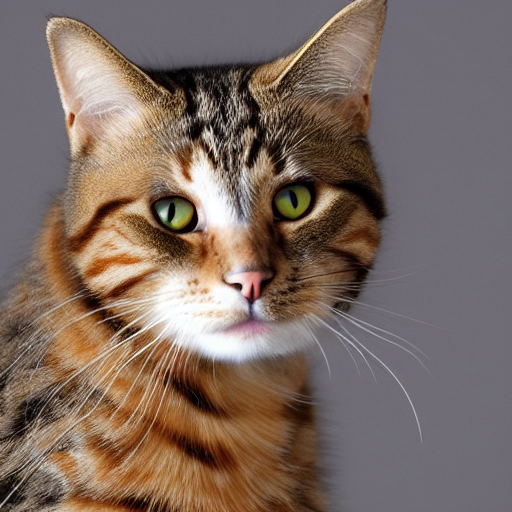

In [ ]:
import IPython.display as display
display.Image("image0.png")


```
optional arguments:
  -h, --help            show this help message and exit
  --h HEIGHT            height of the image
  --w WIDTH             width of the image
  --p PROMPT            Description of the image you want to generate
  --n NUMSTEPS          Number of Steps
  --u UNCONDITIONALGUIDANCESCALE
                        UNCONDITIONALGUIDANCESCALE
  --t TEMPERATURE       Temparature
  --b BATCHSIZE         Number of Images to generate
  --o OUTPUT            Output Folder where to store the Image
  ```



### Running the script with arguments

#### Prompt
```python stable-diffusion.py --p "cat with three eyes"```

#### Number of iterations
```
python stable-diffusion.py --p "cat with three eyes" --n 100
```
#### Batch Size (No of images to generate)
```
python stable-diffusion.py --p "cat with three eyes" --b 2
```



After that we will write a DOCKERFILE to containernize this script and then run it on bacalhau


## **Building and Running on docker**

In this step you will create a  `Dockerfile` to create your Docker deployment. The `Dockerfile` is a text document that contains the commands used to assemble the image.

First, create the `Dockerfile`.

Next, add your desired configuration to the `Dockerfile`. These commands specify how the image will be built, and what extra requirements will be included.

Dockerfile


```
FROM tensorflow/tensorflow:latest-gpu

RUN apt-get -y update

RUN apt-get -y install git

RUN python3 -m pip install --upgrade pip

RUN python -m pip install regex tqdm Pillow

RUN pip install git+https://github.com/fchollet/stable-diffusion-tensorflow --upgrade --quiet

RUN pip install tensorflow tensorflow_addons ftfy --upgrade --quiet

RUN apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

ADD stable-diffusion.py stable-diffusion.py

RUN python stable-diffusion.py --n 5
```


In the dockerfile we will be using the tensorflow GPU image and then installing dependencies like git and other python python 

To Build the docker container run the docker build command


```
docker build -t <hub-user>/<repo-name>:<tag> .
```


Please replace

&lt;hub-user> with your docker hub username, If you don’t have a docker hub account [Follow these instructions to create docker account](https://docs.docker.com/docker-id/), and use the username of the account you created

&lt;repo-name> This is the name of the container, you can name it anything you want

&lt;tag> This is not required but you can use the latest tag

After you have build the container, the next step is to test it locally and then push it docker hub

Now you can push this repository to the registry designated by its name or tag.


```
 docker push <hub-user>/<repo-name>:<tag>
```


After the repo image has been pushed to docker hub, we can now use the container for running on bacalhau

## **Running the container on bacalhau**

After the repo image has been pushed to docker hub, we can now use the container for running on bacalhau

We use the --gpu flag to denote the no of GPU we are going to use


```
bacalhau docker run \
--gpu 1 \
jsacex/stable-diffusion-keras \
-- python stable-diffusion.py --o ./outputs
```


Insalling bacalhau

In [ ]:
%%bash
curl -sL https://get.bacalhau.org/install.sh | bash

Your system is linux_amd64

BACALHAU CLI is detected:
Client Version: v0.2.5
Server Version: v0.2.5
Reinstalling BACALHAU CLI - /usr/local/bin/bacalhau...
Getting the latest BACALHAU CLI...
Installing v0.2.5 BACALHAU CLI...
Verified OK
Extracting tarball ...
NOT verifying Bin
bacalhau installed into /usr/local/bin successfully.
Client Version: v0.2.5
Server Version: v0.2.5


In [ ]:
%%bash
echo $(bacalhau docker run --id-only --wait --wait-timeout-secs 1000 --gpu 1 jsacex/stable-diffusion-keras -- python stable-diffusion.py --o ./outputs) > job_id.txt
cat job_id.txt

4f758052-0543-40b5-bd86-6ab41e77389a


In [ ]:
%%bash
bacalhau list --id-filter $(cat job_id.txt)

 CREATED   ID        JOB                      STATE      VERIFIED  PUBLISHED               
 17:33:46  4f758052  Docker jsacex/stable...  Completed            /ipfs/QmcQEQPg934Pow... 



Where it says "`Completed `", that means the job is done, and we can get the results.

To find out more information about your job, run the following command:

In [ ]:
%%bash
bacalhau describe $(cat job_id.txt)

Since there is no error we can’t see any error instead we see the state of our job to be complete, that means 
we can download the results!
we create a temporary directory to save our results

In [ ]:
%%bash
mkdir results

To Download the results of your job, run 

---

the following command:

In [ ]:
%%bash
bacalhau get  $(cat job_id.txt)  --output-dir results

17:38:25.343 | INF bacalhau/get.go:67 > Fetching results of job '4f758052-0543-40b5-bd86-6ab41e77389a'...
2022/09/29 17:38:25 failed to sufficiently increase receive buffer size (was: 208 kiB, wanted: 2048 kiB, got: 416 kiB). See https://github.com/lucas-clemente/quic-go/wiki/UDP-Receive-Buffer-Size for details.
17:38:35.851 | INF ipfs/downloader.go:115 > Found 1 result shards, downloading to temporary folder.
17:38:37.1 | INF ipfs/downloader.go:195 > Combining shard from output volume 'outputs' to final location: '/content/results'


After the download has finished you should 
see the following contents in results directory

In [ ]:
%%bash
ls results/

shards	stderr	stdout	volumes



By Inspecting the Downloaded Results

We can find that our generated image is located in /volumes/outputs/mars.png


```
.
├── shards
│   └── job-2c281c1b-1a3e-4863-830f-8c48d117f6ea-shard-0-host-QmdZQ7ZbhnvWY1J12XYKGHApJ6aufKyLNSvf8jZBrBaAVL
│       ├── exitCode
│       ├── stderr
│       └── stdout
├── stderr
├── stdout
└── volumes
    └── outputs
        └── cat.png
```

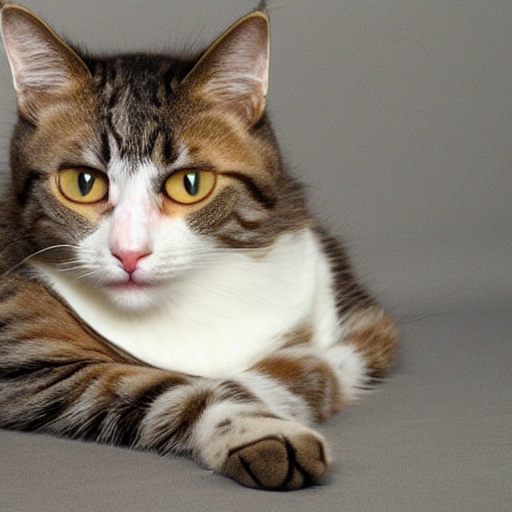

In [ ]:
import IPython.display as display
display.Image("results/volumes/outputs/image0.png")

In [ ]:
%%bash
bacalhau describe $(cat job_id.txt) --spec > job.yaml

In [ ]:
%%bash
cat job.yaml